<a href="https://colab.research.google.com/github/kiyaoiki/Sales-forecasting-Dashboard/blob/main/Sales_Forecasting_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib prophet

In [ ]:
!pip install prophet --use-pep517

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mock_kaggle.csv to mock_kaggle.csv
Saving store.csv to store.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
Saving Sample - Superstore.csv to Sample - Superstore.csv


In [ ]:
uploaded.keys()


dict_keys(['mock_kaggle.csv', 'store.csv', 'test.csv', 'train.csv', 'Sample - Superstore.csv'])

In [ ]:
import pandas as pd

sales_keywords = ["sales", "amount", "profit", "revenue", "venda", "price"]

for filename in uploaded.keys():
    print("\n📄 Checking File:", filename)

    # Try different encodings
    for enc in ["utf-8", "ISO-8859-1", "latin1"]:
        try:
            df = pd.read_csv(filename, encoding=enc, low_memory=False)
            print(f"   ✔ Opened successfully using encoding: {enc}")
            break
        except Exception as e:
            pass

    # Display columns
    print("   Columns:", df.columns.tolist())

    # Detect sales-related columns
    possible_sales = [col for col in df.columns if any(word.lower() in col.lower() for word in sales_keywords)]
    print("   🔎 Possible Sales columns:", possible_sales)



📄 Checking File: mock_kaggle.csv
   ✔ Opened successfully using encoding: utf-8
   Columns: ['data', 'venda', 'estoque', 'preco']
   🔎 Possible Sales columns: ['venda']

📄 Checking File: store.csv
   ✔ Opened successfully using encoding: utf-8
   Columns: ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
   🔎 Possible Sales columns: []

📄 Checking File: test.csv
   ✔ Opened successfully using encoding: utf-8
   Columns: ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
   🔎 Possible Sales columns: []

📄 Checking File: train.csv
   ✔ Opened successfully using encoding: utf-8
   Columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
   🔎 Possible Sales columns: ['Sales']

📄 Checking File: Sample - Superstore.csv
   ✔ Opened successfully using encoding: ISO-8859-1
 

In [ ]:
import pandas as pd

dfs = []

for file_name in uploaded.keys():
    print("Reading:", file_name)
    try:
        df_temp = pd.read_csv(file_name, encoding="utf-8")
    except:
        df_temp = pd.read_csv(file_name, encoding="ISO-8859-1")
    dfs.append(df_temp)


Reading: mock_kaggle.csv
Reading: store.csv
Reading: test.csv
Reading: train.csv
Reading: Sample - Superstore.csv


/tmp/ipython-input-1398490564.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_name, encoding="utf-8")


In [ ]:
import pandas as pd

dfs = []

for file_name in uploaded.keys():
    print("Reading:", file_name)
    try:
        df_temp = pd.read_csv(file_name, encoding="utf-8")
    except:
        df_temp = pd.read_csv(file_name, encoding="ISO-8859-1")
    dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)


Reading: mock_kaggle.csv
Reading: store.csv
Reading: test.csv
Reading: train.csv


/tmp/ipython-input-1358035965.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_name, encoding="utf-8")


Reading: Sample - Superstore.csv


In [ ]:
print("Combined shape:", df.shape)
print("Column names:")
df.columns

Combined shape: (1070343, 43)
Column names:


Index(['data', 'venda', 'estoque', 'preco', 'Store', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Id', 'DayOfWeek', 'Date', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Sales', 'Customers',
       'Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd

# 1️⃣ Create a single date column from: Date, Order Date, data
df["date_final"] = pd.to_datetime(
    df["Date"]
    .fillna(df["Order Date"])
    .fillna(df["data"]),
    errors="coerce"
)

# 2️⃣ Create a single sales column from: Sales, venda
df["sales_final"] = df["Sales"].fillna(df["venda"])

print("Null dates:", df["date_final"].isna().sum())
print("Null sales:", df["sales_final"].isna().sum())

df[["Date", "Order Date", "data", "Sales", "venda", "date_final", "sales_final"]].head(10)


Null dates: 11109
Null sales: 42203


,Date,Order Date,data,Sales,venda,date_final,sales_final
0,NaN,NaN,2014-01-01,NaN,0.0,2014-01-01,0.0
1,NaN,NaN,2014-01-02,NaN,70.0,2014-01-02,70.0
2,NaN,NaN,2014-01-03,NaN,59.0,2014-01-03,59.0
3,NaN,NaN,2014-01-04,NaN,93.0,2014-01-04,93.0
4,NaN,NaN,2014-01-05,NaN,96.0,2014-01-05,96.0
5,NaN,NaN,2014-01-06,NaN,145.0,2014-01-06,145.0
6,NaN,NaN,2014-01-07,NaN,179.0,2014-01-07,179.0
7,NaN,NaN,2014-01-08,NaN,321.0,2014-01-08,321.0
8,NaN,NaN,2014-01-09,NaN,125.0,2014-01-09,125.0
9,NaN,NaN,2014-01-10,NaN,88.0,2014-01-10,88.0


In [ ]:
# Drop rows with missing final date or sales
df_clean = df.dropna(subset=["date_final", "sales_final"]).copy()

# Ensure correct types
df_clean["sales_final"] = pd.to_numeric(df_clean["sales_final"], errors="coerce")
df_clean = df_clean.dropna(subset=["sales_final"])

print("After cleaning:", df_clean.shape)
df_clean[["date_final", "sales_final"]].head()


After cleaning: (1018146, 45)


,date_final,sales_final
0,2014-01-01,0.0
1,2014-01-02,70.0
2,2014-01-03,59.0
3,2014-01-04,93.0
4,2014-01-05,96.0


In [ ]:
# Aggregate to daily total sales
daily_sales = (
    df_clean.groupby("date_final")["sales_final"]
            .sum()
            .reset_index()
            .sort_values("date_final")
)

# Prophet expects ds (date) and y (value)
daily_sales = daily_sales.rename(columns={"date_final": "ds", "sales_final": "y"})

print("Daily time-series shape:", daily_sales.shape)
daily_sales.head()


Daily time-series shape: (1308, 2)


,ds,y
0,2013-01-01,97235.0
1,2013-01-02,6949829.0
2,2013-01-03,6347820.0
3,2013-01-04,6638954.0
4,2013-01-05,5951593.0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Optional: basic stats
print(daily_sales[["y"]].describe())

# Use last 60 days as test
test_size = 60
train = daily_sales.iloc[:-test_size].copy()
test = daily_sales.iloc[-test_size:].copy()

print("Train:", train["ds"].min(), "to", train["ds"].max())
print("Test :", test["ds"].min(), "to", test["ds"].max())


                  y
count  1.308000e+03
mean   4.490264e+06
std    3.859441e+06
min    0.000000e+00
25%    2.397500e+02
50%    5.937906e+06
75%    7.593688e+06
max    1.562355e+07
Train: 2013-01-01 00:00:00 to 2016-06-01 00:00:00
Test : 2016-06-02 00:00:00 to 2016-07-31 00:00:00


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

test_size = 60  # same as before

# 1️⃣ Train the model
try:
    from prophet import Prophet
except ImportError:
    from fbprophet import Prophet

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode="additive"
)

model.fit(train[["ds", "y"]])

# 2️⃣ Predict for next test_size days
future_for_eval = model.make_future_dataframe(periods=test_size, freq="D")
forecast_full = model.predict(future_for_eval)

# 3️⃣ Filter only the forecast rows matching test dates
forecast_for_test = forecast_full[forecast_full["ds"].isin(test["ds"])]

# 4️⃣ Merge
eval_df = pd.merge(
    test[["ds", "y"]],
    forecast_for_test[["ds", "yhat", "yhat_lower", "yhat_upper"]],
    on="ds",
    how="left"
)

# 5️⃣ Drop missing predictions
eval_df = eval_df.dropna(subset=["yhat"])

# 6️⃣ Compute metrics
mae = mean_absolute_error(eval_df["y"], eval_df["yhat"])
rmse = np.sqrt(mean_squared_error(eval_df["y"], eval_df["yhat"]))   # FIXED
mape = (np.abs((eval_df["y"] - eval_df["yhat"]) / eval_df["y"])).mean() * 100

print("Rows used for evaluation:", len(eval_df))
print("MAE :", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")


Rows used for evaluation: 60
MAE : 1888283.48
RMSE: 2757246.25
MAPE: 1330518.81 %


In [ ]:
FORECAST_PERIODS = 90  # forecast next 90 days

final_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode="additive"
)

final_model.fit(daily_sales[["ds", "y"]])

future = final_model.make_future_dataframe(periods=FORECAST_PERIODS, freq="D")
forecast = final_model.predict(future)


In [ ]:
import numpy as np
import pandas as pd

# 1️⃣ Prepare actual (historical) data
actual_df = daily_sales[["ds", "y"]].copy()
actual_df = actual_df.rename(columns={
    "ds": "date",
    "y": "actual_sales"
})

# 2️⃣ Prepare forecast data (includes past + future)
forecast_df = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].copy()
forecast_df = forecast_df.rename(columns={
    "ds": "date",
    "yhat": "predicted_sales",
    "yhat_lower": "lower_bound",
    "yhat_upper": "upper_bound"
})

# 3️⃣ Mark fitted vs future forecast
last_actual_date = actual_df["date"].max()

forecast_df["horizon_type"] = np.where(
    forecast_df["date"] > last_actual_date,
    "forecast",   # future dates
    "fitted"      # model fit on past dates
)

# 4️⃣ Merge forecast with actuals (left join, keep all forecast dates)
combined = pd.merge(
    forecast_df,
    actual_df,
    on="date",
    how="left"
)

# 5️⃣ Final table for Power BI
output = combined[[
    "date",
    "actual_sales",
    "predicted_sales",
    "lower_bound",
    "upper_bound",
    "horizon_type"
]]

print(output.tail())


           date  actual_sales  predicted_sales   lower_bound   upper_bound  \
1393 2016-10-25           NaN    -3.219623e+06 -5.870702e+06 -7.016607e+05   
1394 2016-10-26           NaN    -3.561418e+06 -6.306167e+06 -1.047970e+06   
1395 2016-10-27           NaN    -3.787206e+06 -6.459320e+06 -1.284496e+06   
1396 2016-10-28           NaN    -3.407847e+06 -5.913691e+06 -7.459377e+05   
1397 2016-10-29           NaN    -4.117673e+06 -6.535673e+06 -1.471390e+06   

     horizon_type  
1393     forecast  
1394     forecast  
1395     forecast  
1396     forecast  
1397     forecast  


In [ ]:
OUTPUT_PATH = "sales_forecast_for_powerbi.csv"
output.to_csv(OUTPUT_PATH, index=False)
print("Saved:", OUTPUT_PATH)


Saved: sales_forecast_for_powerbi.csv


In [ ]:
from google.colab import files
files.download("sales_forecast_for_powerbi.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

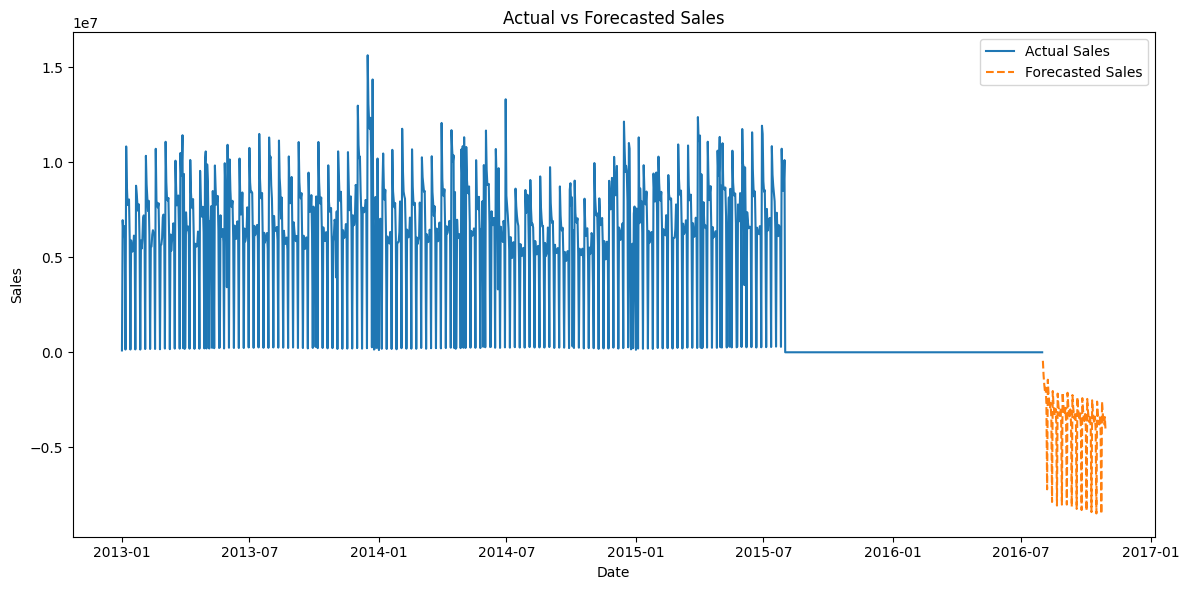

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot actuals
plt.plot(output["date"], output["actual_sales"], label="Actual Sales")

# Plot forecast (future only)
future_mask = output["horizon_type"] == "forecast"
plt.plot(
    output.loc[future_mask, "date"],
    output.loc[future_mask, "predicted_sales"],
    linestyle="--",
    label="Forecasted Sales"
)

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Actual vs Forecasted Sales")
plt.legend()
plt.tight_layout()
plt.show()
